In [2]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


Using device: cuda


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\vilch\OneDrive\Escritorio\5TH SEMESTER CODE\MACHINE LEARNING\PROYECTO_4\venv\lib\site-packages\transformers\training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
  0%|          | 0/3750 [00:00<?, ?it/s]c:\Users\vilch\OneDrive\Escritorio\5TH SEMESTER CODE\MACHINE LEARNING\PROYECTO_4\venv\lib\site-packages\transformers\models\bert\modeling_bert.py:439: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:455.)
  attn_output = to

{'loss': 0.7785, 'grad_norm': 3.6171493530273438, 'learning_rate': 1.0000000000000002e-06, 'epoch': 0.01}


  1%|          | 21/3750 [00:03<07:18,  8.50it/s]

{'loss': 0.8701, 'grad_norm': 5.544187068939209, 'learning_rate': 2.0000000000000003e-06, 'epoch': 0.02}


  1%|          | 31/3750 [00:04<07:17,  8.49it/s]

{'loss': 0.7966, 'grad_norm': 9.00181770324707, 'learning_rate': 3e-06, 'epoch': 0.02}


  1%|          | 41/3750 [00:05<07:13,  8.55it/s]

{'loss': 0.7313, 'grad_norm': 9.449100494384766, 'learning_rate': 4.000000000000001e-06, 'epoch': 0.03}


  1%|▏         | 51/3750 [00:06<07:12,  8.55it/s]

{'loss': 0.7082, 'grad_norm': 9.487064361572266, 'learning_rate': 5e-06, 'epoch': 0.04}


  2%|▏         | 61/3750 [00:07<07:15,  8.48it/s]

{'loss': 0.6619, 'grad_norm': 4.862002849578857, 'learning_rate': 6e-06, 'epoch': 0.05}


  2%|▏         | 71/3750 [00:08<07:13,  8.49it/s]

{'loss': 0.6559, 'grad_norm': 7.569128036499023, 'learning_rate': 7.000000000000001e-06, 'epoch': 0.06}


  2%|▏         | 81/3750 [00:10<07:10,  8.53it/s]

{'loss': 0.636, 'grad_norm': 8.274881362915039, 'learning_rate': 8.000000000000001e-06, 'epoch': 0.06}


  2%|▏         | 91/3750 [00:11<07:16,  8.38it/s]

{'loss': 0.5917, 'grad_norm': 5.319862365722656, 'learning_rate': 9e-06, 'epoch': 0.07}


  3%|▎         | 101/3750 [00:12<07:06,  8.56it/s]

{'loss': 0.6129, 'grad_norm': 9.762558937072754, 'learning_rate': 1e-05, 'epoch': 0.08}


  3%|▎         | 111/3750 [00:13<07:07,  8.51it/s]

{'loss': 0.559, 'grad_norm': 5.861993789672852, 'learning_rate': 1.1000000000000001e-05, 'epoch': 0.09}


  3%|▎         | 121/3750 [00:14<07:07,  8.49it/s]

{'loss': 0.5565, 'grad_norm': 9.4033842086792, 'learning_rate': 1.2e-05, 'epoch': 0.1}


  3%|▎         | 131/3750 [00:16<07:17,  8.26it/s]

{'loss': 0.5064, 'grad_norm': 6.833018779754639, 'learning_rate': 1.3000000000000001e-05, 'epoch': 0.1}


  4%|▍         | 141/3750 [00:17<07:13,  8.32it/s]

{'loss': 0.4894, 'grad_norm': 5.882830619812012, 'learning_rate': 1.4000000000000001e-05, 'epoch': 0.11}


  4%|▍         | 151/3750 [00:18<07:11,  8.35it/s]

{'loss': 0.4896, 'grad_norm': 14.289345741271973, 'learning_rate': 1.5e-05, 'epoch': 0.12}


  4%|▍         | 161/3750 [00:19<07:05,  8.43it/s]

{'loss': 0.4258, 'grad_norm': 6.5164947509765625, 'learning_rate': 1.6000000000000003e-05, 'epoch': 0.13}


  5%|▍         | 171/3750 [00:20<07:06,  8.38it/s]

{'loss': 0.4343, 'grad_norm': 7.3783955574035645, 'learning_rate': 1.7000000000000003e-05, 'epoch': 0.14}


  5%|▍         | 181/3750 [00:22<07:02,  8.45it/s]

{'loss': 0.4958, 'grad_norm': 8.582746505737305, 'learning_rate': 1.8e-05, 'epoch': 0.14}


  5%|▌         | 191/3750 [00:23<07:06,  8.34it/s]

{'loss': 0.4888, 'grad_norm': 7.117321491241455, 'learning_rate': 1.9e-05, 'epoch': 0.15}


  5%|▌         | 201/3750 [00:24<07:08,  8.28it/s]

{'loss': 0.3412, 'grad_norm': 6.562110424041748, 'learning_rate': 2e-05, 'epoch': 0.16}


  6%|▌         | 211/3750 [00:25<07:06,  8.29it/s]

{'loss': 0.3845, 'grad_norm': 7.742090225219727, 'learning_rate': 2.1e-05, 'epoch': 0.17}


  6%|▌         | 221/3750 [00:26<07:09,  8.22it/s]

{'loss': 0.3431, 'grad_norm': 17.837928771972656, 'learning_rate': 2.2000000000000003e-05, 'epoch': 0.18}


  6%|▌         | 231/3750 [00:28<07:02,  8.33it/s]

{'loss': 0.3246, 'grad_norm': 14.715842247009277, 'learning_rate': 2.3000000000000003e-05, 'epoch': 0.18}


  6%|▋         | 241/3750 [00:29<07:01,  8.32it/s]

{'loss': 0.339, 'grad_norm': 3.7256553173065186, 'learning_rate': 2.4e-05, 'epoch': 0.19}


  7%|▋         | 251/3750 [00:30<06:57,  8.39it/s]

{'loss': 0.3367, 'grad_norm': 15.381202697753906, 'learning_rate': 2.5e-05, 'epoch': 0.2}


  7%|▋         | 261/3750 [00:31<06:57,  8.35it/s]

{'loss': 0.5512, 'grad_norm': 9.107133865356445, 'learning_rate': 2.6000000000000002e-05, 'epoch': 0.21}


  7%|▋         | 271/3750 [00:32<06:59,  8.30it/s]

{'loss': 0.3651, 'grad_norm': 13.894200325012207, 'learning_rate': 2.7000000000000002e-05, 'epoch': 0.22}


  7%|▋         | 281/3750 [00:34<06:55,  8.34it/s]

{'loss': 0.453, 'grad_norm': 8.717333793640137, 'learning_rate': 2.8000000000000003e-05, 'epoch': 0.22}


  8%|▊         | 291/3750 [00:35<06:54,  8.34it/s]

{'loss': 0.5025, 'grad_norm': 9.427658081054688, 'learning_rate': 2.9e-05, 'epoch': 0.23}


  8%|▊         | 302/3750 [00:36<06:47,  8.46it/s]

{'loss': 0.3831, 'grad_norm': 9.465743064880371, 'learning_rate': 3e-05, 'epoch': 0.24}


  8%|▊         | 311/3750 [00:37<06:48,  8.42it/s]

{'loss': 0.3791, 'grad_norm': 6.665836811065674, 'learning_rate': 3.1e-05, 'epoch': 0.25}


  9%|▊         | 321/3750 [00:38<06:45,  8.45it/s]

{'loss': 0.3629, 'grad_norm': 8.093563079833984, 'learning_rate': 3.2000000000000005e-05, 'epoch': 0.26}


  9%|▉         | 331/3750 [00:39<06:45,  8.42it/s]

{'loss': 0.3891, 'grad_norm': 10.230535507202148, 'learning_rate': 3.3e-05, 'epoch': 0.26}


  9%|▉         | 341/3750 [00:41<06:47,  8.36it/s]

{'loss': 0.3865, 'grad_norm': 10.988609313964844, 'learning_rate': 3.4000000000000007e-05, 'epoch': 0.27}


  9%|▉         | 351/3750 [00:42<06:44,  8.39it/s]

{'loss': 0.3072, 'grad_norm': 5.588288307189941, 'learning_rate': 3.5e-05, 'epoch': 0.28}


 10%|▉         | 361/3750 [00:43<06:44,  8.37it/s]

{'loss': 0.4336, 'grad_norm': 7.763365745544434, 'learning_rate': 3.6e-05, 'epoch': 0.29}


 10%|▉         | 371/3750 [00:44<06:36,  8.53it/s]

{'loss': 0.3298, 'grad_norm': 3.5437135696411133, 'learning_rate': 3.7e-05, 'epoch': 0.3}


 10%|█         | 381/3750 [00:45<06:44,  8.33it/s]

{'loss': 0.3271, 'grad_norm': 12.068288803100586, 'learning_rate': 3.8e-05, 'epoch': 0.3}


 10%|█         | 391/3750 [00:47<06:39,  8.41it/s]

{'loss': 0.395, 'grad_norm': 5.94931173324585, 'learning_rate': 3.9000000000000006e-05, 'epoch': 0.31}


 11%|█         | 401/3750 [00:48<06:39,  8.37it/s]

{'loss': 0.4614, 'grad_norm': 6.625622749328613, 'learning_rate': 4e-05, 'epoch': 0.32}


 11%|█         | 411/3750 [00:49<06:37,  8.40it/s]

{'loss': 0.4399, 'grad_norm': 9.772867202758789, 'learning_rate': 4.1e-05, 'epoch': 0.33}


 11%|█         | 421/3750 [00:50<06:39,  8.34it/s]

{'loss': 0.3727, 'grad_norm': 4.05003023147583, 'learning_rate': 4.2e-05, 'epoch': 0.34}


 11%|█▏        | 431/3750 [00:51<06:36,  8.38it/s]

{'loss': 0.2773, 'grad_norm': 9.35132884979248, 'learning_rate': 4.3e-05, 'epoch': 0.34}


 12%|█▏        | 441/3750 [00:53<06:38,  8.30it/s]

{'loss': 0.2684, 'grad_norm': 2.4920549392700195, 'learning_rate': 4.4000000000000006e-05, 'epoch': 0.35}


 12%|█▏        | 451/3750 [00:54<06:34,  8.36it/s]

{'loss': 0.4106, 'grad_norm': 12.649120330810547, 'learning_rate': 4.5e-05, 'epoch': 0.36}


 12%|█▏        | 461/3750 [00:55<06:32,  8.38it/s]

{'loss': 0.4408, 'grad_norm': 8.658069610595703, 'learning_rate': 4.600000000000001e-05, 'epoch': 0.37}


 13%|█▎        | 471/3750 [00:56<06:32,  8.34it/s]

{'loss': 0.4222, 'grad_norm': 3.154534339904785, 'learning_rate': 4.7e-05, 'epoch': 0.38}


 13%|█▎        | 481/3750 [00:57<06:31,  8.34it/s]

{'loss': 0.2989, 'grad_norm': 2.884347677230835, 'learning_rate': 4.8e-05, 'epoch': 0.38}


 13%|█▎        | 491/3750 [00:59<06:29,  8.36it/s]

{'loss': 0.37, 'grad_norm': 26.060888290405273, 'learning_rate': 4.9e-05, 'epoch': 0.39}


 13%|█▎        | 500/3750 [01:00<06:23,  8.48it/s]

{'loss': 0.3131, 'grad_norm': 4.768750190734863, 'learning_rate': 5e-05, 'epoch': 0.4}


 14%|█▎        | 511/3750 [01:02<07:03,  7.64it/s]

{'loss': 0.3199, 'grad_norm': 15.055815696716309, 'learning_rate': 4.984615384615385e-05, 'epoch': 0.41}


 14%|█▍        | 521/3750 [01:04<06:23,  8.41it/s]

{'loss': 0.339, 'grad_norm': 20.731637954711914, 'learning_rate': 4.969230769230769e-05, 'epoch': 0.42}


 14%|█▍        | 531/3750 [01:05<06:26,  8.34it/s]

{'loss': 0.3779, 'grad_norm': 6.514471054077148, 'learning_rate': 4.953846153846154e-05, 'epoch': 0.42}


 14%|█▍        | 541/3750 [01:06<06:18,  8.47it/s]

{'loss': 0.3766, 'grad_norm': 4.752567768096924, 'learning_rate': 4.9384615384615384e-05, 'epoch': 0.43}


 15%|█▍        | 551/3750 [01:07<06:17,  8.48it/s]

{'loss': 0.3076, 'grad_norm': 7.9094719886779785, 'learning_rate': 4.923076923076924e-05, 'epoch': 0.44}


 15%|█▍        | 561/3750 [01:08<06:14,  8.52it/s]

{'loss': 0.47, 'grad_norm': 4.245532035827637, 'learning_rate': 4.907692307692308e-05, 'epoch': 0.45}


 15%|█▌        | 571/3750 [01:09<06:17,  8.42it/s]

{'loss': 0.3886, 'grad_norm': 3.944584608078003, 'learning_rate': 4.892307692307693e-05, 'epoch': 0.46}


 15%|█▌        | 581/3750 [01:11<06:11,  8.52it/s]

{'loss': 0.3656, 'grad_norm': 9.70303726196289, 'learning_rate': 4.876923076923077e-05, 'epoch': 0.46}


 16%|█▌        | 591/3750 [01:12<06:11,  8.51it/s]

{'loss': 0.3342, 'grad_norm': 7.757494926452637, 'learning_rate': 4.861538461538462e-05, 'epoch': 0.47}


 16%|█▌        | 601/3750 [01:13<06:15,  8.38it/s]

{'loss': 0.4051, 'grad_norm': 6.665780544281006, 'learning_rate': 4.846153846153846e-05, 'epoch': 0.48}


 16%|█▋        | 611/3750 [01:14<06:08,  8.52it/s]

{'loss': 0.2958, 'grad_norm': 6.716667175292969, 'learning_rate': 4.830769230769231e-05, 'epoch': 0.49}


 17%|█▋        | 621/3750 [01:15<06:08,  8.50it/s]

{'loss': 0.3431, 'grad_norm': 35.053016662597656, 'learning_rate': 4.815384615384615e-05, 'epoch': 0.5}


 17%|█▋        | 631/3750 [01:16<06:08,  8.47it/s]

{'loss': 0.4249, 'grad_norm': 21.19349479675293, 'learning_rate': 4.8e-05, 'epoch': 0.5}


 17%|█▋        | 642/3750 [01:18<06:06,  8.48it/s]

{'loss': 0.3741, 'grad_norm': 2.4514145851135254, 'learning_rate': 4.784615384615384e-05, 'epoch': 0.51}


 17%|█▋        | 651/3750 [01:19<06:08,  8.40it/s]

{'loss': 0.3216, 'grad_norm': 6.045230865478516, 'learning_rate': 4.76923076923077e-05, 'epoch': 0.52}


 18%|█▊        | 661/3750 [01:20<06:02,  8.52it/s]

{'loss': 0.4565, 'grad_norm': 8.846723556518555, 'learning_rate': 4.753846153846154e-05, 'epoch': 0.53}


 18%|█▊        | 671/3750 [01:21<06:04,  8.45it/s]

{'loss': 0.3201, 'grad_norm': 5.343795299530029, 'learning_rate': 4.738461538461539e-05, 'epoch': 0.54}


 18%|█▊        | 681/3750 [01:22<05:59,  8.53it/s]

{'loss': 0.345, 'grad_norm': 8.152860641479492, 'learning_rate': 4.723076923076923e-05, 'epoch': 0.54}


 18%|█▊        | 691/3750 [01:24<06:00,  8.48it/s]

{'loss': 0.4105, 'grad_norm': 8.426447868347168, 'learning_rate': 4.707692307692308e-05, 'epoch': 0.55}


 19%|█▊        | 701/3750 [01:25<06:01,  8.44it/s]

{'loss': 0.329, 'grad_norm': 10.761519432067871, 'learning_rate': 4.692307692307693e-05, 'epoch': 0.56}


 19%|█▉        | 711/3750 [01:26<06:03,  8.36it/s]

{'loss': 0.4274, 'grad_norm': 6.745718955993652, 'learning_rate': 4.676923076923077e-05, 'epoch': 0.57}


 19%|█▉        | 721/3750 [01:27<06:00,  8.39it/s]

{'loss': 0.391, 'grad_norm': 7.452898025512695, 'learning_rate': 4.661538461538462e-05, 'epoch': 0.58}


 19%|█▉        | 731/3750 [01:28<06:05,  8.26it/s]

{'loss': 0.3535, 'grad_norm': 15.53187370300293, 'learning_rate': 4.646153846153846e-05, 'epoch': 0.58}


 20%|█▉        | 741/3750 [01:30<06:01,  8.31it/s]

{'loss': 0.3253, 'grad_norm': 7.794975280761719, 'learning_rate': 4.630769230769231e-05, 'epoch': 0.59}


 20%|██        | 752/3750 [01:31<05:59,  8.33it/s]

{'loss': 0.3951, 'grad_norm': 6.016945838928223, 'learning_rate': 4.615384615384616e-05, 'epoch': 0.6}


 20%|██        | 761/3750 [01:32<05:56,  8.38it/s]

{'loss': 0.3961, 'grad_norm': 5.911284446716309, 'learning_rate': 4.600000000000001e-05, 'epoch': 0.61}


 21%|██        | 771/3750 [01:33<05:57,  8.34it/s]

{'loss': 0.324, 'grad_norm': 8.181744575500488, 'learning_rate': 4.584615384615385e-05, 'epoch': 0.62}


 21%|██        | 781/3750 [01:34<05:57,  8.31it/s]

{'loss': 0.383, 'grad_norm': 24.122591018676758, 'learning_rate': 4.56923076923077e-05, 'epoch': 0.62}


 21%|██        | 791/3750 [01:36<05:56,  8.30it/s]

{'loss': 0.3239, 'grad_norm': 3.8540804386138916, 'learning_rate': 4.553846153846154e-05, 'epoch': 0.63}


 21%|██▏       | 801/3750 [01:37<05:54,  8.32it/s]

{'loss': 0.3524, 'grad_norm': 12.73193073272705, 'learning_rate': 4.538461538461539e-05, 'epoch': 0.64}


 22%|██▏       | 811/3750 [01:38<05:56,  8.25it/s]

{'loss': 0.4032, 'grad_norm': 4.495752334594727, 'learning_rate': 4.523076923076923e-05, 'epoch': 0.65}


 22%|██▏       | 821/3750 [01:39<05:50,  8.35it/s]

{'loss': 0.3072, 'grad_norm': 12.087689399719238, 'learning_rate': 4.507692307692308e-05, 'epoch': 0.66}


 22%|██▏       | 831/3750 [01:40<05:51,  8.30it/s]

{'loss': 0.4593, 'grad_norm': 4.749791622161865, 'learning_rate': 4.492307692307692e-05, 'epoch': 0.66}


 22%|██▏       | 841/3750 [01:42<05:52,  8.25it/s]

{'loss': 0.3888, 'grad_norm': 4.014493942260742, 'learning_rate': 4.476923076923077e-05, 'epoch': 0.67}


 23%|██▎       | 851/3750 [01:43<05:48,  8.31it/s]

{'loss': 0.3886, 'grad_norm': 4.023274898529053, 'learning_rate': 4.461538461538462e-05, 'epoch': 0.68}


 23%|██▎       | 861/3750 [01:44<05:48,  8.28it/s]

{'loss': 0.3095, 'grad_norm': 7.658865928649902, 'learning_rate': 4.4461538461538466e-05, 'epoch': 0.69}


 23%|██▎       | 871/3750 [01:45<05:47,  8.28it/s]

{'loss': 0.31, 'grad_norm': 18.133445739746094, 'learning_rate': 4.430769230769231e-05, 'epoch': 0.7}


 23%|██▎       | 881/3750 [01:46<05:58,  8.00it/s]

{'loss': 0.4152, 'grad_norm': 4.843207836151123, 'learning_rate': 4.415384615384616e-05, 'epoch': 0.7}


 24%|██▍       | 891/3750 [01:48<05:44,  8.30it/s]

{'loss': 0.3106, 'grad_norm': 5.751587390899658, 'learning_rate': 4.4000000000000006e-05, 'epoch': 0.71}


 24%|██▍       | 901/3750 [01:49<05:41,  8.34it/s]

{'loss': 0.3609, 'grad_norm': 4.110016345977783, 'learning_rate': 4.384615384615385e-05, 'epoch': 0.72}


 24%|██▍       | 911/3750 [01:50<05:40,  8.33it/s]

{'loss': 0.3181, 'grad_norm': 10.465254783630371, 'learning_rate': 4.3692307692307696e-05, 'epoch': 0.73}


 25%|██▍       | 921/3750 [01:51<05:39,  8.34it/s]

{'loss': 0.2525, 'grad_norm': 8.755001068115234, 'learning_rate': 4.353846153846154e-05, 'epoch': 0.74}


 25%|██▍       | 931/3750 [01:52<05:37,  8.36it/s]

{'loss': 0.411, 'grad_norm': 5.827517032623291, 'learning_rate': 4.338461538461539e-05, 'epoch': 0.74}


 25%|██▌       | 941/3750 [01:54<05:35,  8.38it/s]

{'loss': 0.329, 'grad_norm': 6.956897258758545, 'learning_rate': 4.323076923076923e-05, 'epoch': 0.75}


 25%|██▌       | 951/3750 [01:55<05:35,  8.33it/s]

{'loss': 0.376, 'grad_norm': 4.242761611938477, 'learning_rate': 4.3076923076923084e-05, 'epoch': 0.76}


 26%|██▌       | 961/3750 [01:56<05:34,  8.34it/s]

{'loss': 0.2929, 'grad_norm': 3.216177463531494, 'learning_rate': 4.2923076923076926e-05, 'epoch': 0.77}


 26%|██▌       | 971/3750 [01:57<05:32,  8.35it/s]

{'loss': 0.3469, 'grad_norm': 10.792654037475586, 'learning_rate': 4.2769230769230775e-05, 'epoch': 0.78}


 26%|██▌       | 981/3750 [01:58<05:30,  8.37it/s]

{'loss': 0.3839, 'grad_norm': 5.96963357925415, 'learning_rate': 4.2615384615384617e-05, 'epoch': 0.78}


 26%|██▋       | 991/3750 [01:59<05:30,  8.35it/s]

{'loss': 0.381, 'grad_norm': 6.685211181640625, 'learning_rate': 4.2461538461538465e-05, 'epoch': 0.79}


 27%|██▋       | 1000/3750 [02:01<05:27,  8.39it/s]

{'loss': 0.3572, 'grad_norm': 7.183111190795898, 'learning_rate': 4.230769230769231e-05, 'epoch': 0.8}


 27%|██▋       | 1011/3750 [02:03<05:51,  7.79it/s]

{'loss': 0.3756, 'grad_norm': 5.824344635009766, 'learning_rate': 4.2153846153846156e-05, 'epoch': 0.81}


 27%|██▋       | 1021/3750 [02:04<05:29,  8.29it/s]

{'loss': 0.3707, 'grad_norm': 4.961770534515381, 'learning_rate': 4.2e-05, 'epoch': 0.82}


 27%|██▋       | 1031/3750 [02:05<05:25,  8.35it/s]

{'loss': 0.3121, 'grad_norm': 2.7767786979675293, 'learning_rate': 4.1846153846153846e-05, 'epoch': 0.82}


 28%|██▊       | 1041/3750 [02:06<05:26,  8.31it/s]

{'loss': 0.2912, 'grad_norm': 5.665323734283447, 'learning_rate': 4.169230769230769e-05, 'epoch': 0.83}


 28%|██▊       | 1051/3750 [02:08<05:21,  8.40it/s]

{'loss': 0.3379, 'grad_norm': 7.505190372467041, 'learning_rate': 4.1538461538461544e-05, 'epoch': 0.84}


 28%|██▊       | 1061/3750 [02:09<05:18,  8.43it/s]

{'loss': 0.3981, 'grad_norm': 2.331847667694092, 'learning_rate': 4.1384615384615386e-05, 'epoch': 0.85}


 29%|██▊       | 1071/3750 [02:10<05:16,  8.46it/s]

{'loss': 0.277, 'grad_norm': 4.833169937133789, 'learning_rate': 4.1230769230769234e-05, 'epoch': 0.86}


 29%|██▉       | 1081/3750 [02:11<05:17,  8.42it/s]

{'loss': 0.3465, 'grad_norm': 14.518654823303223, 'learning_rate': 4.1076923076923076e-05, 'epoch': 0.86}


 29%|██▉       | 1091/3750 [02:12<05:16,  8.40it/s]

{'loss': 0.3203, 'grad_norm': 10.715801239013672, 'learning_rate': 4.0923076923076925e-05, 'epoch': 0.87}


 29%|██▉       | 1101/3750 [02:14<05:14,  8.43it/s]

{'loss': 0.3658, 'grad_norm': 4.370661735534668, 'learning_rate': 4.0769230769230773e-05, 'epoch': 0.88}


 30%|██▉       | 1111/3750 [02:15<05:15,  8.38it/s]

{'loss': 0.2821, 'grad_norm': 4.962891578674316, 'learning_rate': 4.0615384615384615e-05, 'epoch': 0.89}


 30%|██▉       | 1121/3750 [02:16<05:12,  8.42it/s]

{'loss': 0.2729, 'grad_norm': 5.09268856048584, 'learning_rate': 4.0461538461538464e-05, 'epoch': 0.9}


 30%|███       | 1132/3750 [02:17<05:11,  8.39it/s]

{'loss': 0.4262, 'grad_norm': 7.340101718902588, 'learning_rate': 4.0307692307692306e-05, 'epoch': 0.9}


 30%|███       | 1141/3750 [02:18<05:13,  8.32it/s]

{'loss': 0.3067, 'grad_norm': 5.7051825523376465, 'learning_rate': 4.0153846153846155e-05, 'epoch': 0.91}


 31%|███       | 1151/3750 [02:19<05:10,  8.38it/s]

{'loss': 0.342, 'grad_norm': 9.996855735778809, 'learning_rate': 4e-05, 'epoch': 0.92}


 31%|███       | 1161/3750 [02:21<05:06,  8.45it/s]

{'loss': 0.3056, 'grad_norm': 9.952757835388184, 'learning_rate': 3.984615384615385e-05, 'epoch': 0.93}


 31%|███       | 1171/3750 [02:22<05:07,  8.38it/s]

{'loss': 0.3092, 'grad_norm': 6.251247406005859, 'learning_rate': 3.9692307692307694e-05, 'epoch': 0.94}


 31%|███▏      | 1181/3750 [02:23<05:06,  8.37it/s]

{'loss': 0.3584, 'grad_norm': 10.317532539367676, 'learning_rate': 3.953846153846154e-05, 'epoch': 0.94}


 32%|███▏      | 1191/3750 [02:24<05:05,  8.39it/s]

{'loss': 0.3759, 'grad_norm': 12.726003646850586, 'learning_rate': 3.9384615384615384e-05, 'epoch': 0.95}


 32%|███▏      | 1201/3750 [02:25<05:03,  8.40it/s]

{'loss': 0.3329, 'grad_norm': 11.031498908996582, 'learning_rate': 3.923076923076923e-05, 'epoch': 0.96}


 32%|███▏      | 1211/3750 [02:27<05:04,  8.34it/s]

{'loss': 0.3756, 'grad_norm': 3.7172601222991943, 'learning_rate': 3.9076923076923075e-05, 'epoch': 0.97}


 33%|███▎      | 1221/3750 [02:28<05:02,  8.37it/s]

{'loss': 0.3051, 'grad_norm': 4.678064346313477, 'learning_rate': 3.8923076923076924e-05, 'epoch': 0.98}


 33%|███▎      | 1231/3750 [02:29<04:56,  8.49it/s]

{'loss': 0.3207, 'grad_norm': 15.792779922485352, 'learning_rate': 3.8769230769230766e-05, 'epoch': 0.98}


 33%|███▎      | 1241/3750 [02:30<04:58,  8.40it/s]

{'loss': 0.2058, 'grad_norm': 1.6449860334396362, 'learning_rate': 3.861538461538462e-05, 'epoch': 0.99}


 33%|███▎      | 1250/3750 [02:31<04:56,  8.42it/s]

{'loss': 0.4385, 'grad_norm': 5.987486362457275, 'learning_rate': 3.846153846153846e-05, 'epoch': 1.0}


                                                   
 33%|███▎      | 1251/3750 [02:42<2:13:36,  3.21s/it]

{'eval_loss': 0.3165448009967804, 'eval_accuracy': 0.8706, 'eval_runtime': 10.2893, 'eval_samples_per_second': 485.94, 'eval_steps_per_second': 7.678, 'epoch': 1.0}


 34%|███▎      | 1261/3750 [02:43<08:33,  4.85it/s]  

{'loss': 0.2107, 'grad_norm': 7.76999044418335, 'learning_rate': 3.830769230769231e-05, 'epoch': 1.01}


 34%|███▍      | 1271/3750 [02:44<05:02,  8.18it/s]

{'loss': 0.1984, 'grad_norm': 6.061771869659424, 'learning_rate': 3.8153846153846153e-05, 'epoch': 1.02}


 34%|███▍      | 1281/3750 [02:45<04:52,  8.43it/s]

{'loss': 0.2816, 'grad_norm': 7.9412007331848145, 'learning_rate': 3.8e-05, 'epoch': 1.02}


 34%|███▍      | 1291/3750 [02:46<04:56,  8.30it/s]

{'loss': 0.3487, 'grad_norm': 10.364449501037598, 'learning_rate': 3.784615384615385e-05, 'epoch': 1.03}


 35%|███▍      | 1301/3750 [02:48<04:52,  8.38it/s]

{'loss': 0.1518, 'grad_norm': 2.0024728775024414, 'learning_rate': 3.769230769230769e-05, 'epoch': 1.04}


 35%|███▍      | 1311/3750 [02:49<04:52,  8.34it/s]

{'loss': 0.2109, 'grad_norm': 5.7837233543396, 'learning_rate': 3.753846153846154e-05, 'epoch': 1.05}


 35%|███▌      | 1321/3750 [02:50<04:49,  8.38it/s]

{'loss': 0.1836, 'grad_norm': 11.871721267700195, 'learning_rate': 3.738461538461538e-05, 'epoch': 1.06}


 35%|███▌      | 1331/3750 [02:51<04:47,  8.41it/s]

{'loss': 0.2156, 'grad_norm': 16.562149047851562, 'learning_rate': 3.723076923076923e-05, 'epoch': 1.06}


 36%|███▌      | 1341/3750 [02:52<04:47,  8.39it/s]

{'loss': 0.2397, 'grad_norm': 2.546776533126831, 'learning_rate': 3.707692307692308e-05, 'epoch': 1.07}


 36%|███▌      | 1351/3750 [02:54<04:45,  8.41it/s]

{'loss': 0.277, 'grad_norm': 6.536759376525879, 'learning_rate': 3.692307692307693e-05, 'epoch': 1.08}


 36%|███▋      | 1361/3750 [02:55<04:46,  8.35it/s]

{'loss': 0.2605, 'grad_norm': 4.9892168045043945, 'learning_rate': 3.676923076923077e-05, 'epoch': 1.09}


 37%|███▋      | 1372/3750 [02:56<04:41,  8.45it/s]

{'loss': 0.2335, 'grad_norm': 6.453691482543945, 'learning_rate': 3.661538461538462e-05, 'epoch': 1.1}


 37%|███▋      | 1381/3750 [02:57<04:45,  8.28it/s]

{'loss': 0.2213, 'grad_norm': 2.1322567462921143, 'learning_rate': 3.646153846153846e-05, 'epoch': 1.1}


 37%|███▋      | 1391/3750 [02:58<04:42,  8.34it/s]

{'loss': 0.1821, 'grad_norm': 8.219794273376465, 'learning_rate': 3.630769230769231e-05, 'epoch': 1.11}


 37%|███▋      | 1401/3750 [03:00<04:38,  8.42it/s]

{'loss': 0.2927, 'grad_norm': 10.163578987121582, 'learning_rate': 3.615384615384615e-05, 'epoch': 1.12}


 38%|███▊      | 1412/3750 [03:01<04:38,  8.40it/s]

{'loss': 0.2976, 'grad_norm': 9.00770092010498, 'learning_rate': 3.6e-05, 'epoch': 1.13}


 38%|███▊      | 1421/3750 [03:02<04:37,  8.40it/s]

{'loss': 0.1817, 'grad_norm': 5.218907356262207, 'learning_rate': 3.584615384615384e-05, 'epoch': 1.14}


 38%|███▊      | 1431/3750 [03:03<04:37,  8.37it/s]

{'loss': 0.2461, 'grad_norm': 9.523905754089355, 'learning_rate': 3.569230769230769e-05, 'epoch': 1.14}


 38%|███▊      | 1441/3750 [03:04<04:32,  8.46it/s]

{'loss': 0.2277, 'grad_norm': 8.780213356018066, 'learning_rate': 3.553846153846154e-05, 'epoch': 1.15}


 39%|███▊      | 1451/3750 [03:06<04:35,  8.35it/s]

{'loss': 0.2053, 'grad_norm': 9.562273979187012, 'learning_rate': 3.538461538461539e-05, 'epoch': 1.16}


 39%|███▉      | 1461/3750 [03:07<04:34,  8.35it/s]

{'loss': 0.1764, 'grad_norm': 0.990990936756134, 'learning_rate': 3.523076923076923e-05, 'epoch': 1.17}


 39%|███▉      | 1471/3750 [03:08<04:33,  8.34it/s]

{'loss': 0.3675, 'grad_norm': 24.738876342773438, 'learning_rate': 3.507692307692308e-05, 'epoch': 1.18}


 39%|███▉      | 1481/3750 [03:09<04:30,  8.39it/s]

{'loss': 0.1603, 'grad_norm': 6.156850337982178, 'learning_rate': 3.492307692307693e-05, 'epoch': 1.18}


 40%|███▉      | 1491/3750 [03:10<04:28,  8.40it/s]

{'loss': 0.2167, 'grad_norm': 2.180182456970215, 'learning_rate': 3.476923076923077e-05, 'epoch': 1.19}


 40%|████      | 1500/3750 [03:11<04:28,  8.39it/s]

{'loss': 0.1814, 'grad_norm': 2.258326768875122, 'learning_rate': 3.461538461538462e-05, 'epoch': 1.2}


 40%|████      | 1511/3750 [03:15<05:07,  7.29it/s]

{'loss': 0.2064, 'grad_norm': 1.3197605609893799, 'learning_rate': 3.446153846153846e-05, 'epoch': 1.21}


 41%|████      | 1521/3750 [03:16<04:25,  8.39it/s]

{'loss': 0.2264, 'grad_norm': 4.7033491134643555, 'learning_rate': 3.430769230769231e-05, 'epoch': 1.22}


 41%|████      | 1531/3750 [03:17<04:24,  8.38it/s]

{'loss': 0.3985, 'grad_norm': 8.488273620605469, 'learning_rate': 3.415384615384615e-05, 'epoch': 1.22}


 41%|████      | 1541/3750 [03:18<04:22,  8.41it/s]

{'loss': 0.2772, 'grad_norm': 6.885252952575684, 'learning_rate': 3.4000000000000007e-05, 'epoch': 1.23}


 41%|████▏     | 1551/3750 [03:19<04:20,  8.43it/s]

{'loss': 0.1976, 'grad_norm': 3.589048147201538, 'learning_rate': 3.384615384615385e-05, 'epoch': 1.24}


 42%|████▏     | 1561/3750 [03:21<04:22,  8.33it/s]

{'loss': 0.2333, 'grad_norm': 15.383821487426758, 'learning_rate': 3.36923076923077e-05, 'epoch': 1.25}


 42%|████▏     | 1571/3750 [03:22<04:21,  8.32it/s]

{'loss': 0.2376, 'grad_norm': 4.9289140701293945, 'learning_rate': 3.353846153846154e-05, 'epoch': 1.26}


 42%|████▏     | 1581/3750 [03:23<04:18,  8.39it/s]

{'loss': 0.2318, 'grad_norm': 1.408370018005371, 'learning_rate': 3.338461538461539e-05, 'epoch': 1.26}


 42%|████▏     | 1591/3750 [03:24<04:19,  8.33it/s]

{'loss': 0.2073, 'grad_norm': 13.950783729553223, 'learning_rate': 3.323076923076923e-05, 'epoch': 1.27}


 43%|████▎     | 1601/3750 [03:25<04:16,  8.39it/s]

{'loss': 0.2575, 'grad_norm': 7.949916362762451, 'learning_rate': 3.307692307692308e-05, 'epoch': 1.28}


 43%|████▎     | 1611/3750 [03:27<04:16,  8.34it/s]

{'loss': 0.1748, 'grad_norm': 6.429008483886719, 'learning_rate': 3.292307692307692e-05, 'epoch': 1.29}


 43%|████▎     | 1621/3750 [03:28<04:12,  8.43it/s]

{'loss': 0.1998, 'grad_norm': 8.325716018676758, 'learning_rate': 3.276923076923077e-05, 'epoch': 1.3}


 43%|████▎     | 1631/3750 [03:29<04:14,  8.32it/s]

{'loss': 0.2027, 'grad_norm': 14.85293960571289, 'learning_rate': 3.261538461538462e-05, 'epoch': 1.3}


 44%|████▍     | 1641/3750 [03:30<04:11,  8.38it/s]

{'loss': 0.4216, 'grad_norm': 10.185206413269043, 'learning_rate': 3.2461538461538466e-05, 'epoch': 1.31}


 44%|████▍     | 1651/3750 [03:31<04:12,  8.32it/s]

{'loss': 0.2394, 'grad_norm': 8.968511581420898, 'learning_rate': 3.230769230769231e-05, 'epoch': 1.32}


 44%|████▍     | 1661/3750 [03:33<04:09,  8.38it/s]

{'loss': 0.1592, 'grad_norm': 12.665614128112793, 'learning_rate': 3.215384615384616e-05, 'epoch': 1.33}


 45%|████▍     | 1671/3750 [03:34<04:09,  8.32it/s]

{'loss': 0.1826, 'grad_norm': 16.74271011352539, 'learning_rate': 3.2000000000000005e-05, 'epoch': 1.34}


 45%|████▍     | 1681/3750 [03:35<04:10,  8.26it/s]

{'loss': 0.2421, 'grad_norm': 11.56430721282959, 'learning_rate': 3.184615384615385e-05, 'epoch': 1.34}


 45%|████▌     | 1691/3750 [03:36<04:07,  8.34it/s]

{'loss': 0.2121, 'grad_norm': 3.9607274532318115, 'learning_rate': 3.1692307692307696e-05, 'epoch': 1.35}


 45%|████▌     | 1701/3750 [03:37<04:06,  8.30it/s]

{'loss': 0.2445, 'grad_norm': 2.63946533203125, 'learning_rate': 3.153846153846154e-05, 'epoch': 1.36}


 46%|████▌     | 1711/3750 [03:39<04:03,  8.37it/s]

{'loss': 0.269, 'grad_norm': 4.076394557952881, 'learning_rate': 3.1384615384615386e-05, 'epoch': 1.37}


 46%|████▌     | 1721/3750 [03:40<04:03,  8.34it/s]

{'loss': 0.2332, 'grad_norm': 2.847032070159912, 'learning_rate': 3.123076923076923e-05, 'epoch': 1.38}


 46%|████▌     | 1731/3750 [03:41<04:03,  8.30it/s]

{'loss': 0.1801, 'grad_norm': 4.159883499145508, 'learning_rate': 3.107692307692308e-05, 'epoch': 1.38}


 46%|████▋     | 1742/3750 [03:42<03:58,  8.41it/s]

{'loss': 0.1575, 'grad_norm': 8.834685325622559, 'learning_rate': 3.0923076923076926e-05, 'epoch': 1.39}


 47%|████▋     | 1751/3750 [03:43<03:58,  8.39it/s]

{'loss': 0.1742, 'grad_norm': 4.540913105010986, 'learning_rate': 3.0769230769230774e-05, 'epoch': 1.4}


 47%|████▋     | 1761/3750 [03:45<03:57,  8.37it/s]

{'loss': 0.241, 'grad_norm': 4.407129764556885, 'learning_rate': 3.0615384615384616e-05, 'epoch': 1.41}


 47%|████▋     | 1771/3750 [03:46<03:56,  8.38it/s]

{'loss': 0.2757, 'grad_norm': 5.488508701324463, 'learning_rate': 3.0461538461538465e-05, 'epoch': 1.42}


 47%|████▋     | 1781/3750 [03:47<03:56,  8.31it/s]

{'loss': 0.3017, 'grad_norm': 7.388798713684082, 'learning_rate': 3.030769230769231e-05, 'epoch': 1.42}


 48%|████▊     | 1791/3750 [03:48<03:56,  8.29it/s]

{'loss': 0.1852, 'grad_norm': 10.912354469299316, 'learning_rate': 3.0153846153846155e-05, 'epoch': 1.43}


 48%|████▊     | 1801/3750 [03:49<03:53,  8.35it/s]

{'loss': 0.2378, 'grad_norm': 13.769415855407715, 'learning_rate': 3e-05, 'epoch': 1.44}


 48%|████▊     | 1811/3750 [03:51<03:53,  8.31it/s]

{'loss': 0.2199, 'grad_norm': 9.886287689208984, 'learning_rate': 2.9846153846153846e-05, 'epoch': 1.45}


 49%|████▊     | 1821/3750 [03:52<03:51,  8.34it/s]

{'loss': 0.1926, 'grad_norm': 8.738602638244629, 'learning_rate': 2.969230769230769e-05, 'epoch': 1.46}


 49%|████▉     | 1831/3750 [03:53<03:49,  8.35it/s]

{'loss': 0.1835, 'grad_norm': 9.033225059509277, 'learning_rate': 2.9538461538461543e-05, 'epoch': 1.46}


 49%|████▉     | 1841/3750 [03:54<03:49,  8.31it/s]

{'loss': 0.2153, 'grad_norm': 10.846813201904297, 'learning_rate': 2.938461538461539e-05, 'epoch': 1.47}


 49%|████▉     | 1851/3750 [03:55<03:48,  8.33it/s]

{'loss': 0.2595, 'grad_norm': 10.850388526916504, 'learning_rate': 2.9230769230769234e-05, 'epoch': 1.48}


 50%|████▉     | 1861/3750 [03:57<03:47,  8.30it/s]

{'loss': 0.1821, 'grad_norm': 6.435494899749756, 'learning_rate': 2.907692307692308e-05, 'epoch': 1.49}


 50%|████▉     | 1871/3750 [03:58<03:45,  8.34it/s]

{'loss': 0.2883, 'grad_norm': 2.5283071994781494, 'learning_rate': 2.8923076923076925e-05, 'epoch': 1.5}


 50%|█████     | 1881/3750 [03:59<03:43,  8.34it/s]

{'loss': 0.227, 'grad_norm': 1.676087498664856, 'learning_rate': 2.876923076923077e-05, 'epoch': 1.5}


 50%|█████     | 1891/3750 [04:00<03:43,  8.33it/s]

{'loss': 0.2547, 'grad_norm': 9.925268173217773, 'learning_rate': 2.8615384615384615e-05, 'epoch': 1.51}


 51%|█████     | 1901/3750 [04:01<03:42,  8.32it/s]

{'loss': 0.1268, 'grad_norm': 16.605594635009766, 'learning_rate': 2.846153846153846e-05, 'epoch': 1.52}


 51%|█████     | 1911/3750 [04:03<03:40,  8.33it/s]

{'loss': 0.129, 'grad_norm': 8.353453636169434, 'learning_rate': 2.8307692307692306e-05, 'epoch': 1.53}


 51%|█████▏    | 1922/3750 [04:04<03:38,  8.36it/s]

{'loss': 0.2586, 'grad_norm': 6.1406378746032715, 'learning_rate': 2.8153846153846154e-05, 'epoch': 1.54}


 51%|█████▏    | 1931/3750 [04:05<03:36,  8.40it/s]

{'loss': 0.3082, 'grad_norm': 0.6929542422294617, 'learning_rate': 2.8000000000000003e-05, 'epoch': 1.54}


 52%|█████▏    | 1941/3750 [04:06<03:36,  8.36it/s]

{'loss': 0.1899, 'grad_norm': 11.638971328735352, 'learning_rate': 2.7846153846153848e-05, 'epoch': 1.55}


 52%|█████▏    | 1951/3750 [04:07<03:35,  8.36it/s]

{'loss': 0.29, 'grad_norm': 6.86860990524292, 'learning_rate': 2.7692307692307694e-05, 'epoch': 1.56}


 52%|█████▏    | 1961/3750 [04:08<03:35,  8.32it/s]

{'loss': 0.267, 'grad_norm': 1.925144076347351, 'learning_rate': 2.7538461538461542e-05, 'epoch': 1.57}


 53%|█████▎    | 1971/3750 [04:10<03:30,  8.44it/s]

{'loss': 0.1748, 'grad_norm': 9.575345039367676, 'learning_rate': 2.7384615384615387e-05, 'epoch': 1.58}


 53%|█████▎    | 1981/3750 [04:11<03:32,  8.32it/s]

{'loss': 0.1639, 'grad_norm': 6.912413120269775, 'learning_rate': 2.7230769230769233e-05, 'epoch': 1.58}


 53%|█████▎    | 1991/3750 [04:12<03:30,  8.37it/s]

{'loss': 0.2625, 'grad_norm': 2.7515788078308105, 'learning_rate': 2.7076923076923078e-05, 'epoch': 1.59}


 53%|█████▎    | 2000/3750 [04:13<03:28,  8.40it/s]

{'loss': 0.178, 'grad_norm': 3.633608102798462, 'learning_rate': 2.6923076923076923e-05, 'epoch': 1.6}


 54%|█████▎    | 2011/3750 [04:15<03:43,  7.78it/s]

{'loss': 0.157, 'grad_norm': 9.482400894165039, 'learning_rate': 2.676923076923077e-05, 'epoch': 1.61}


 54%|█████▍    | 2021/3750 [04:17<03:27,  8.33it/s]

{'loss': 0.1755, 'grad_norm': 2.147493362426758, 'learning_rate': 2.6615384615384614e-05, 'epoch': 1.62}


 54%|█████▍    | 2031/3750 [04:18<03:26,  8.32it/s]

{'loss': 0.1981, 'grad_norm': 9.308393478393555, 'learning_rate': 2.6461538461538466e-05, 'epoch': 1.62}


 54%|█████▍    | 2041/3750 [04:19<03:21,  8.47it/s]

{'loss': 0.1354, 'grad_norm': 12.84128475189209, 'learning_rate': 2.630769230769231e-05, 'epoch': 1.63}


 55%|█████▍    | 2051/3750 [04:20<03:21,  8.42it/s]

{'loss': 0.2799, 'grad_norm': 7.23354959487915, 'learning_rate': 2.6153846153846157e-05, 'epoch': 1.64}


 55%|█████▍    | 2061/3750 [04:21<03:20,  8.44it/s]

{'loss': 0.1332, 'grad_norm': 0.9112977385520935, 'learning_rate': 2.6000000000000002e-05, 'epoch': 1.65}


 55%|█████▌    | 2071/3750 [04:23<03:20,  8.36it/s]

{'loss': 0.1819, 'grad_norm': 4.160863399505615, 'learning_rate': 2.5846153846153847e-05, 'epoch': 1.66}


 55%|█████▌    | 2081/3750 [04:24<03:20,  8.31it/s]

{'loss': 0.2245, 'grad_norm': 5.864714622497559, 'learning_rate': 2.5692307692307692e-05, 'epoch': 1.66}


 56%|█████▌    | 2091/3750 [04:25<03:19,  8.31it/s]

{'loss': 0.2036, 'grad_norm': 5.377191543579102, 'learning_rate': 2.5538461538461538e-05, 'epoch': 1.67}


 56%|█████▌    | 2101/3750 [04:26<03:17,  8.34it/s]

{'loss': 0.256, 'grad_norm': 5.943747520446777, 'learning_rate': 2.5384615384615383e-05, 'epoch': 1.68}


 56%|█████▋    | 2112/3750 [04:27<03:13,  8.45it/s]

{'loss': 0.2134, 'grad_norm': 17.18986701965332, 'learning_rate': 2.523076923076923e-05, 'epoch': 1.69}


 57%|█████▋    | 2121/3750 [04:29<03:14,  8.37it/s]

{'loss': 0.1608, 'grad_norm': 20.676158905029297, 'learning_rate': 2.5076923076923077e-05, 'epoch': 1.7}


 57%|█████▋    | 2131/3750 [04:30<03:12,  8.41it/s]

{'loss': 0.1822, 'grad_norm': 7.617027759552002, 'learning_rate': 2.4923076923076926e-05, 'epoch': 1.7}


 57%|█████▋    | 2141/3750 [04:31<03:11,  8.42it/s]

{'loss': 0.3184, 'grad_norm': 4.230839729309082, 'learning_rate': 2.476923076923077e-05, 'epoch': 1.71}


 57%|█████▋    | 2151/3750 [04:32<03:10,  8.40it/s]

{'loss': 0.2081, 'grad_norm': 1.0548099279403687, 'learning_rate': 2.461538461538462e-05, 'epoch': 1.72}


 58%|█████▊    | 2161/3750 [04:33<03:08,  8.42it/s]

{'loss': 0.245, 'grad_norm': 4.194726467132568, 'learning_rate': 2.4461538461538465e-05, 'epoch': 1.73}


 58%|█████▊    | 2171/3750 [04:35<03:09,  8.35it/s]

{'loss': 0.22, 'grad_norm': 4.392409801483154, 'learning_rate': 2.430769230769231e-05, 'epoch': 1.74}


 58%|█████▊    | 2181/3750 [04:36<03:07,  8.35it/s]

{'loss': 0.1903, 'grad_norm': 13.578359603881836, 'learning_rate': 2.4153846153846155e-05, 'epoch': 1.74}


 58%|█████▊    | 2192/3750 [04:37<03:03,  8.47it/s]

{'loss': 0.1906, 'grad_norm': 0.8119056224822998, 'learning_rate': 2.4e-05, 'epoch': 1.75}


 59%|█████▊    | 2201/3750 [04:38<03:03,  8.45it/s]

{'loss': 0.1465, 'grad_norm': 12.061748504638672, 'learning_rate': 2.384615384615385e-05, 'epoch': 1.76}


 59%|█████▉    | 2211/3750 [04:39<03:03,  8.37it/s]

{'loss': 0.2229, 'grad_norm': 4.279898166656494, 'learning_rate': 2.3692307692307695e-05, 'epoch': 1.77}


 59%|█████▉    | 2221/3750 [04:40<03:04,  8.29it/s]

{'loss': 0.2678, 'grad_norm': 5.459616184234619, 'learning_rate': 2.353846153846154e-05, 'epoch': 1.78}


 59%|█████▉    | 2231/3750 [04:42<03:03,  8.30it/s]

{'loss': 0.2476, 'grad_norm': 11.923966407775879, 'learning_rate': 2.3384615384615385e-05, 'epoch': 1.78}


 60%|█████▉    | 2241/3750 [04:43<03:00,  8.34it/s]

{'loss': 0.2095, 'grad_norm': 6.610511779785156, 'learning_rate': 2.323076923076923e-05, 'epoch': 1.79}


 60%|██████    | 2251/3750 [04:44<02:59,  8.34it/s]

{'loss': 0.1431, 'grad_norm': 16.25087547302246, 'learning_rate': 2.307692307692308e-05, 'epoch': 1.8}


 60%|██████    | 2261/3750 [04:45<02:59,  8.32it/s]

{'loss': 0.2119, 'grad_norm': 11.82439136505127, 'learning_rate': 2.2923076923076924e-05, 'epoch': 1.81}


 61%|██████    | 2271/3750 [04:46<02:56,  8.37it/s]

{'loss': 0.1405, 'grad_norm': 9.910222053527832, 'learning_rate': 2.276923076923077e-05, 'epoch': 1.82}


 61%|██████    | 2281/3750 [04:48<02:56,  8.33it/s]

{'loss': 0.261, 'grad_norm': 16.788799285888672, 'learning_rate': 2.2615384615384615e-05, 'epoch': 1.82}


 61%|██████    | 2291/3750 [04:49<02:53,  8.41it/s]

{'loss': 0.1053, 'grad_norm': 6.606309413909912, 'learning_rate': 2.246153846153846e-05, 'epoch': 1.83}


 61%|██████▏   | 2301/3750 [04:50<02:53,  8.34it/s]

{'loss': 0.1608, 'grad_norm': 1.4544703960418701, 'learning_rate': 2.230769230769231e-05, 'epoch': 1.84}


 62%|██████▏   | 2311/3750 [04:51<02:51,  8.38it/s]

{'loss': 0.2654, 'grad_norm': 5.366044044494629, 'learning_rate': 2.2153846153846154e-05, 'epoch': 1.85}


 62%|██████▏   | 2321/3750 [04:52<02:51,  8.31it/s]

{'loss': 0.154, 'grad_norm': 0.9413859248161316, 'learning_rate': 2.2000000000000003e-05, 'epoch': 1.86}


 62%|██████▏   | 2331/3750 [04:54<02:49,  8.39it/s]

{'loss': 0.0929, 'grad_norm': 8.799570083618164, 'learning_rate': 2.1846153846153848e-05, 'epoch': 1.86}


 62%|██████▏   | 2341/3750 [04:55<02:47,  8.41it/s]

{'loss': 0.2541, 'grad_norm': 13.534527778625488, 'learning_rate': 2.1692307692307693e-05, 'epoch': 1.87}


 63%|██████▎   | 2351/3750 [04:56<02:46,  8.38it/s]

{'loss': 0.2113, 'grad_norm': 5.32878303527832, 'learning_rate': 2.1538461538461542e-05, 'epoch': 1.88}


 63%|██████▎   | 2361/3750 [04:57<02:46,  8.33it/s]

{'loss': 0.2184, 'grad_norm': 5.691596508026123, 'learning_rate': 2.1384615384615387e-05, 'epoch': 1.89}


 63%|██████▎   | 2371/3750 [04:58<02:45,  8.32it/s]

{'loss': 0.203, 'grad_norm': 4.698761940002441, 'learning_rate': 2.1230769230769233e-05, 'epoch': 1.9}


 63%|██████▎   | 2381/3750 [05:00<02:43,  8.35it/s]

{'loss': 0.2644, 'grad_norm': 6.405392646789551, 'learning_rate': 2.1076923076923078e-05, 'epoch': 1.9}


 64%|██████▍   | 2391/3750 [05:01<02:42,  8.38it/s]

{'loss': 0.1427, 'grad_norm': 8.63332748413086, 'learning_rate': 2.0923076923076923e-05, 'epoch': 1.91}


 64%|██████▍   | 2401/3750 [05:02<02:41,  8.35it/s]

{'loss': 0.1181, 'grad_norm': 8.597982406616211, 'learning_rate': 2.0769230769230772e-05, 'epoch': 1.92}


 64%|██████▍   | 2411/3750 [05:03<02:38,  8.43it/s]

{'loss': 0.1598, 'grad_norm': 14.622475624084473, 'learning_rate': 2.0615384615384617e-05, 'epoch': 1.93}


 65%|██████▍   | 2421/3750 [05:04<02:38,  8.37it/s]

{'loss': 0.2099, 'grad_norm': 9.856077194213867, 'learning_rate': 2.0461538461538462e-05, 'epoch': 1.94}


 65%|██████▍   | 2431/3750 [05:06<02:36,  8.41it/s]

{'loss': 0.2925, 'grad_norm': 0.6303281188011169, 'learning_rate': 2.0307692307692308e-05, 'epoch': 1.94}


 65%|██████▌   | 2441/3750 [05:07<02:37,  8.33it/s]

{'loss': 0.1229, 'grad_norm': 4.475265979766846, 'learning_rate': 2.0153846153846153e-05, 'epoch': 1.95}


 65%|██████▌   | 2451/3750 [05:08<02:36,  8.28it/s]

{'loss': 0.2551, 'grad_norm': 17.62950325012207, 'learning_rate': 2e-05, 'epoch': 1.96}


 66%|██████▌   | 2461/3750 [05:09<02:34,  8.33it/s]

{'loss': 0.2721, 'grad_norm': 11.024951934814453, 'learning_rate': 1.9846153846153847e-05, 'epoch': 1.97}


 66%|██████▌   | 2471/3750 [05:10<02:33,  8.31it/s]

{'loss': 0.2002, 'grad_norm': 14.034760475158691, 'learning_rate': 1.9692307692307692e-05, 'epoch': 1.98}


 66%|██████▌   | 2481/3750 [05:11<02:32,  8.33it/s]

{'loss': 0.1705, 'grad_norm': 19.025968551635742, 'learning_rate': 1.9538461538461537e-05, 'epoch': 1.98}


 66%|██████▋   | 2491/3750 [05:13<02:30,  8.37it/s]

{'loss': 0.1991, 'grad_norm': 3.443924903869629, 'learning_rate': 1.9384615384615383e-05, 'epoch': 1.99}


 67%|██████▋   | 2500/3750 [05:14<02:27,  8.46it/s]

{'loss': 0.2669, 'grad_norm': 5.536041259765625, 'learning_rate': 1.923076923076923e-05, 'epoch': 2.0}


                                                   
 67%|██████▋   | 2502/3750 [05:25<51:32,  2.48s/it]  

{'eval_loss': 0.3641309440135956, 'eval_accuracy': 0.8846, 'eval_runtime': 10.2733, 'eval_samples_per_second': 486.7, 'eval_steps_per_second': 7.69, 'epoch': 2.0}


 67%|██████▋   | 2511/3750 [05:26<04:23,  4.71it/s]

{'loss': 0.1257, 'grad_norm': 0.31660225987434387, 'learning_rate': 1.9076923076923077e-05, 'epoch': 2.01}


 67%|██████▋   | 2521/3750 [05:27<02:27,  8.31it/s]

{'loss': 0.1669, 'grad_norm': 2.6784324645996094, 'learning_rate': 1.8923076923076925e-05, 'epoch': 2.02}


 67%|██████▋   | 2531/3750 [05:29<02:27,  8.27it/s]

{'loss': 0.1215, 'grad_norm': 5.1796650886535645, 'learning_rate': 1.876923076923077e-05, 'epoch': 2.02}


 68%|██████▊   | 2541/3750 [05:30<02:27,  8.20it/s]

{'loss': 0.1228, 'grad_norm': 1.6791810989379883, 'learning_rate': 1.8615384615384616e-05, 'epoch': 2.03}


 68%|██████▊   | 2551/3750 [05:31<02:23,  8.37it/s]

{'loss': 0.0486, 'grad_norm': 7.995075702667236, 'learning_rate': 1.8461538461538465e-05, 'epoch': 2.04}


 68%|██████▊   | 2562/3750 [05:32<02:17,  8.65it/s]

{'loss': 0.1605, 'grad_norm': 10.271754264831543, 'learning_rate': 1.830769230769231e-05, 'epoch': 2.05}


 69%|██████▊   | 2571/3750 [05:33<02:15,  8.70it/s]

{'loss': 0.0886, 'grad_norm': 19.306354522705078, 'learning_rate': 1.8153846153846155e-05, 'epoch': 2.06}


 69%|██████▉   | 2581/3750 [05:35<02:12,  8.83it/s]

{'loss': 0.0578, 'grad_norm': 0.11243171244859695, 'learning_rate': 1.8e-05, 'epoch': 2.06}


 69%|██████▉   | 2592/3750 [05:36<02:12,  8.72it/s]

{'loss': 0.0599, 'grad_norm': 1.5927482843399048, 'learning_rate': 1.7846153846153846e-05, 'epoch': 2.07}


 69%|██████▉   | 2601/3750 [05:37<02:12,  8.68it/s]

{'loss': 0.0413, 'grad_norm': 0.22651909291744232, 'learning_rate': 1.7692307692307694e-05, 'epoch': 2.08}


 70%|██████▉   | 2611/3750 [05:38<02:17,  8.26it/s]

{'loss': 0.0841, 'grad_norm': 0.8786348104476929, 'learning_rate': 1.753846153846154e-05, 'epoch': 2.09}


 70%|██████▉   | 2621/3750 [05:39<02:10,  8.65it/s]

{'loss': 0.2129, 'grad_norm': 3.573535203933716, 'learning_rate': 1.7384615384615385e-05, 'epoch': 2.1}


 70%|███████   | 2631/3750 [05:40<02:09,  8.65it/s]

{'loss': 0.0455, 'grad_norm': 28.117023468017578, 'learning_rate': 1.723076923076923e-05, 'epoch': 2.1}


 70%|███████   | 2641/3750 [05:41<02:07,  8.67it/s]

{'loss': 0.0185, 'grad_norm': 19.18773078918457, 'learning_rate': 1.7076923076923076e-05, 'epoch': 2.11}


 71%|███████   | 2651/3750 [05:43<02:05,  8.73it/s]

{'loss': 0.1612, 'grad_norm': 2.50541353225708, 'learning_rate': 1.6923076923076924e-05, 'epoch': 2.12}


 71%|███████   | 2662/3750 [05:44<02:05,  8.69it/s]

{'loss': 0.0855, 'grad_norm': 0.5194750428199768, 'learning_rate': 1.676923076923077e-05, 'epoch': 2.13}


 71%|███████▏  | 2672/3750 [05:45<02:03,  8.73it/s]

{'loss': 0.0892, 'grad_norm': 1.6390048265457153, 'learning_rate': 1.6615384615384615e-05, 'epoch': 2.14}


 71%|███████▏  | 2681/3750 [05:46<02:04,  8.60it/s]

{'loss': 0.1026, 'grad_norm': 17.03873634338379, 'learning_rate': 1.646153846153846e-05, 'epoch': 2.14}


 72%|███████▏  | 2691/3750 [05:47<02:02,  8.66it/s]

{'loss': 0.0968, 'grad_norm': 0.17743146419525146, 'learning_rate': 1.630769230769231e-05, 'epoch': 2.15}


 72%|███████▏  | 2701/3750 [05:48<02:00,  8.73it/s]

{'loss': 0.1473, 'grad_norm': 16.23033332824707, 'learning_rate': 1.6153846153846154e-05, 'epoch': 2.16}


 72%|███████▏  | 2712/3750 [05:50<02:01,  8.57it/s]

{'loss': 0.1159, 'grad_norm': 0.09886539727449417, 'learning_rate': 1.6000000000000003e-05, 'epoch': 2.17}


 73%|███████▎  | 2721/3750 [05:51<02:01,  8.47it/s]

{'loss': 0.0489, 'grad_norm': 8.46727466583252, 'learning_rate': 1.5846153846153848e-05, 'epoch': 2.18}


 73%|███████▎  | 2731/3750 [05:52<01:59,  8.50it/s]

{'loss': 0.0346, 'grad_norm': 23.19986915588379, 'learning_rate': 1.5692307692307693e-05, 'epoch': 2.18}


 73%|███████▎  | 2741/3750 [05:53<01:59,  8.43it/s]

{'loss': 0.1443, 'grad_norm': 27.324840545654297, 'learning_rate': 1.553846153846154e-05, 'epoch': 2.19}


 73%|███████▎  | 2751/3750 [05:54<01:56,  8.54it/s]

{'loss': 0.0613, 'grad_norm': 2.4977285861968994, 'learning_rate': 1.5384615384615387e-05, 'epoch': 2.2}


 74%|███████▎  | 2761/3750 [05:55<01:55,  8.53it/s]

{'loss': 0.0823, 'grad_norm': 7.7303972244262695, 'learning_rate': 1.5230769230769232e-05, 'epoch': 2.21}


 74%|███████▍  | 2771/3750 [05:57<01:55,  8.47it/s]

{'loss': 0.0415, 'grad_norm': 1.9215303659439087, 'learning_rate': 1.5076923076923078e-05, 'epoch': 2.22}


 74%|███████▍  | 2781/3750 [05:58<01:54,  8.48it/s]

{'loss': 0.0995, 'grad_norm': 10.896629333496094, 'learning_rate': 1.4923076923076923e-05, 'epoch': 2.22}


 74%|███████▍  | 2791/3750 [05:59<01:51,  8.62it/s]

{'loss': 0.1479, 'grad_norm': 7.945119380950928, 'learning_rate': 1.4769230769230772e-05, 'epoch': 2.23}


 75%|███████▍  | 2801/3750 [06:00<01:50,  8.60it/s]

{'loss': 0.1427, 'grad_norm': 0.12017590552568436, 'learning_rate': 1.4615384615384617e-05, 'epoch': 2.24}


 75%|███████▍  | 2811/3750 [06:01<01:49,  8.57it/s]

{'loss': 0.0724, 'grad_norm': 12.204689025878906, 'learning_rate': 1.4461538461538462e-05, 'epoch': 2.25}


 75%|███████▌  | 2821/3750 [06:02<01:47,  8.63it/s]

{'loss': 0.094, 'grad_norm': 1.7653836011886597, 'learning_rate': 1.4307692307692308e-05, 'epoch': 2.26}


 76%|███████▌  | 2832/3750 [06:04<01:46,  8.60it/s]

{'loss': 0.0915, 'grad_norm': 8.049023628234863, 'learning_rate': 1.4153846153846153e-05, 'epoch': 2.26}


 76%|███████▌  | 2841/3750 [06:05<01:52,  8.11it/s]

{'loss': 0.0432, 'grad_norm': 0.17073120176792145, 'learning_rate': 1.4000000000000001e-05, 'epoch': 2.27}


 76%|███████▌  | 2851/3750 [06:06<01:46,  8.43it/s]

{'loss': 0.1239, 'grad_norm': 19.269756317138672, 'learning_rate': 1.3846153846153847e-05, 'epoch': 2.28}


 76%|███████▋  | 2861/3750 [06:07<01:43,  8.59it/s]

{'loss': 0.1162, 'grad_norm': 5.37814998626709, 'learning_rate': 1.3692307692307694e-05, 'epoch': 2.29}


 77%|███████▋  | 2871/3750 [06:08<01:44,  8.44it/s]

{'loss': 0.0666, 'grad_norm': 0.3483182489871979, 'learning_rate': 1.3538461538461539e-05, 'epoch': 2.3}


 77%|███████▋  | 2881/3750 [06:09<01:43,  8.42it/s]

{'loss': 0.09, 'grad_norm': 0.17989391088485718, 'learning_rate': 1.3384615384615384e-05, 'epoch': 2.3}


 77%|███████▋  | 2891/3750 [06:11<01:42,  8.42it/s]

{'loss': 0.1015, 'grad_norm': 7.847224712371826, 'learning_rate': 1.3230769230769233e-05, 'epoch': 2.31}


 77%|███████▋  | 2901/3750 [06:12<01:39,  8.53it/s]

{'loss': 0.1024, 'grad_norm': 11.414426803588867, 'learning_rate': 1.3076923076923078e-05, 'epoch': 2.32}


 78%|███████▊  | 2911/3750 [06:13<01:37,  8.61it/s]

{'loss': 0.0259, 'grad_norm': 0.31990310549736023, 'learning_rate': 1.2923076923076924e-05, 'epoch': 2.33}


 78%|███████▊  | 2921/3750 [06:14<01:36,  8.57it/s]

{'loss': 0.1187, 'grad_norm': 16.59259605407715, 'learning_rate': 1.2769230769230769e-05, 'epoch': 2.34}


 78%|███████▊  | 2931/3750 [06:15<01:35,  8.60it/s]

{'loss': 0.095, 'grad_norm': 1.8240017890930176, 'learning_rate': 1.2615384615384616e-05, 'epoch': 2.34}


 78%|███████▊  | 2941/3750 [06:16<01:34,  8.57it/s]

{'loss': 0.0705, 'grad_norm': 7.987246036529541, 'learning_rate': 1.2461538461538463e-05, 'epoch': 2.35}


 79%|███████▊  | 2952/3750 [06:18<01:32,  8.63it/s]

{'loss': 0.0667, 'grad_norm': 0.5763306617736816, 'learning_rate': 1.230769230769231e-05, 'epoch': 2.36}


 79%|███████▉  | 2961/3750 [06:19<01:32,  8.55it/s]

{'loss': 0.1294, 'grad_norm': 4.11472225189209, 'learning_rate': 1.2153846153846155e-05, 'epoch': 2.37}


 79%|███████▉  | 2971/3750 [06:20<01:30,  8.58it/s]

{'loss': 0.0591, 'grad_norm': 0.5828579664230347, 'learning_rate': 1.2e-05, 'epoch': 2.38}


 79%|███████▉  | 2981/3750 [06:21<01:29,  8.60it/s]

{'loss': 0.0571, 'grad_norm': 0.33036813139915466, 'learning_rate': 1.1846153846153847e-05, 'epoch': 2.38}


 80%|███████▉  | 2992/3750 [06:22<01:28,  8.59it/s]

{'loss': 0.1033, 'grad_norm': 0.17833037674427032, 'learning_rate': 1.1692307692307693e-05, 'epoch': 2.39}


 80%|████████  | 3000/3750 [06:23<01:28,  8.50it/s]

{'loss': 0.125, 'grad_norm': 19.47365951538086, 'learning_rate': 1.153846153846154e-05, 'epoch': 2.4}


 80%|████████  | 3011/3750 [06:26<01:35,  7.78it/s]

{'loss': 0.0411, 'grad_norm': 10.515460968017578, 'learning_rate': 1.1384615384615385e-05, 'epoch': 2.41}


 81%|████████  | 3021/3750 [06:27<01:25,  8.57it/s]

{'loss': 0.1287, 'grad_norm': 0.10013766586780548, 'learning_rate': 1.123076923076923e-05, 'epoch': 2.42}


 81%|████████  | 3031/3750 [06:28<01:23,  8.63it/s]

{'loss': 0.0335, 'grad_norm': 0.7091102004051208, 'learning_rate': 1.1076923076923077e-05, 'epoch': 2.42}


 81%|████████  | 3041/3750 [06:29<01:21,  8.69it/s]

{'loss': 0.0038, 'grad_norm': 0.08145946264266968, 'learning_rate': 1.0923076923076924e-05, 'epoch': 2.43}


 81%|████████▏ | 3052/3750 [06:31<01:20,  8.63it/s]

{'loss': 0.1942, 'grad_norm': 3.9267046451568604, 'learning_rate': 1.0769230769230771e-05, 'epoch': 2.44}


 82%|████████▏ | 3061/3750 [06:32<01:19,  8.63it/s]

{'loss': 0.053, 'grad_norm': 0.14008377492427826, 'learning_rate': 1.0615384615384616e-05, 'epoch': 2.45}


 82%|████████▏ | 3071/3750 [06:33<01:19,  8.59it/s]

{'loss': 0.0217, 'grad_norm': 0.10218833386898041, 'learning_rate': 1.0461538461538462e-05, 'epoch': 2.46}


 82%|████████▏ | 3081/3750 [06:34<01:18,  8.57it/s]

{'loss': 0.0508, 'grad_norm': 0.08364330232143402, 'learning_rate': 1.0307692307692309e-05, 'epoch': 2.46}


 82%|████████▏ | 3091/3750 [06:35<01:16,  8.61it/s]

{'loss': 0.0948, 'grad_norm': 13.697749137878418, 'learning_rate': 1.0153846153846154e-05, 'epoch': 2.47}


 83%|████████▎ | 3102/3750 [06:36<01:15,  8.63it/s]

{'loss': 0.0579, 'grad_norm': 0.057373467832803726, 'learning_rate': 1e-05, 'epoch': 2.48}


 83%|████████▎ | 3111/3750 [06:38<01:14,  8.62it/s]

{'loss': 0.141, 'grad_norm': 17.901134490966797, 'learning_rate': 9.846153846153846e-06, 'epoch': 2.49}


 83%|████████▎ | 3121/3750 [06:39<01:12,  8.66it/s]

{'loss': 0.0817, 'grad_norm': 3.874049425125122, 'learning_rate': 9.692307692307691e-06, 'epoch': 2.5}


 83%|████████▎ | 3131/3750 [06:40<01:11,  8.60it/s]

{'loss': 0.1198, 'grad_norm': 15.803193092346191, 'learning_rate': 9.538461538461538e-06, 'epoch': 2.5}


 84%|████████▍ | 3141/3750 [06:41<01:10,  8.62it/s]

{'loss': 0.036, 'grad_norm': 0.05337715893983841, 'learning_rate': 9.384615384615385e-06, 'epoch': 2.51}


 84%|████████▍ | 3151/3750 [06:42<01:10,  8.53it/s]

{'loss': 0.0975, 'grad_norm': 11.06421184539795, 'learning_rate': 9.230769230769232e-06, 'epoch': 2.52}


 84%|████████▍ | 3161/3750 [06:43<01:07,  8.74it/s]

{'loss': 0.0334, 'grad_norm': 32.389591217041016, 'learning_rate': 9.076923076923078e-06, 'epoch': 2.53}


 85%|████████▍ | 3171/3750 [06:44<01:07,  8.58it/s]

{'loss': 0.1016, 'grad_norm': 2.3676681518554688, 'learning_rate': 8.923076923076923e-06, 'epoch': 2.54}


 85%|████████▍ | 3182/3750 [06:46<01:05,  8.65it/s]

{'loss': 0.0297, 'grad_norm': 9.209920883178711, 'learning_rate': 8.76923076923077e-06, 'epoch': 2.54}


 85%|████████▌ | 3191/3750 [06:47<01:05,  8.52it/s]

{'loss': 0.0716, 'grad_norm': 1.8970979452133179, 'learning_rate': 8.615384615384615e-06, 'epoch': 2.55}


 85%|████████▌ | 3201/3750 [06:48<01:03,  8.63it/s]

{'loss': 0.0983, 'grad_norm': 15.917550086975098, 'learning_rate': 8.461538461538462e-06, 'epoch': 2.56}


 86%|████████▌ | 3211/3750 [06:49<01:04,  8.36it/s]

{'loss': 0.0637, 'grad_norm': 3.4955008029937744, 'learning_rate': 8.307692307692307e-06, 'epoch': 2.57}


 86%|████████▌ | 3221/3750 [06:50<01:01,  8.66it/s]

{'loss': 0.107, 'grad_norm': 14.667232513427734, 'learning_rate': 8.153846153846154e-06, 'epoch': 2.58}


 86%|████████▌ | 3231/3750 [06:52<01:07,  7.71it/s]

{'loss': 0.0886, 'grad_norm': 10.739214897155762, 'learning_rate': 8.000000000000001e-06, 'epoch': 2.58}


 86%|████████▋ | 3241/3750 [06:53<01:00,  8.42it/s]

{'loss': 0.0847, 'grad_norm': 0.14047619700431824, 'learning_rate': 7.846153846153847e-06, 'epoch': 2.59}


 87%|████████▋ | 3251/3750 [06:54<00:59,  8.39it/s]

{'loss': 0.2302, 'grad_norm': 9.664864540100098, 'learning_rate': 7.692307692307694e-06, 'epoch': 2.6}


 87%|████████▋ | 3261/3750 [06:55<00:57,  8.49it/s]

{'loss': 0.0303, 'grad_norm': 0.6304087042808533, 'learning_rate': 7.538461538461539e-06, 'epoch': 2.61}


 87%|████████▋ | 3271/3750 [06:56<00:56,  8.52it/s]

{'loss': 0.107, 'grad_norm': 0.10182368010282516, 'learning_rate': 7.384615384615386e-06, 'epoch': 2.62}


 87%|████████▋ | 3281/3750 [06:57<00:55,  8.47it/s]

{'loss': 0.068, 'grad_norm': 5.3410234451293945, 'learning_rate': 7.230769230769231e-06, 'epoch': 2.62}


 88%|████████▊ | 3291/3750 [06:59<00:53,  8.56it/s]

{'loss': 0.0884, 'grad_norm': 4.117556095123291, 'learning_rate': 7.076923076923076e-06, 'epoch': 2.63}


 88%|████████▊ | 3301/3750 [07:00<00:52,  8.51it/s]

{'loss': 0.0169, 'grad_norm': 0.12667016685009003, 'learning_rate': 6.923076923076923e-06, 'epoch': 2.64}


 88%|████████▊ | 3311/3750 [07:01<00:51,  8.54it/s]

{'loss': 0.1495, 'grad_norm': 10.586098670959473, 'learning_rate': 6.7692307692307695e-06, 'epoch': 2.65}


 89%|████████▊ | 3321/3750 [07:02<00:50,  8.46it/s]

{'loss': 0.0726, 'grad_norm': 0.08984595537185669, 'learning_rate': 6.6153846153846165e-06, 'epoch': 2.66}


 89%|████████▉ | 3331/3750 [07:03<00:49,  8.51it/s]

{'loss': 0.0253, 'grad_norm': 0.2954495847225189, 'learning_rate': 6.461538461538462e-06, 'epoch': 2.66}


 89%|████████▉ | 3341/3750 [07:04<00:47,  8.53it/s]

{'loss': 0.1574, 'grad_norm': 12.094367027282715, 'learning_rate': 6.307692307692308e-06, 'epoch': 2.67}


 89%|████████▉ | 3352/3750 [07:06<00:46,  8.47it/s]

{'loss': 0.0441, 'grad_norm': 6.238056659698486, 'learning_rate': 6.153846153846155e-06, 'epoch': 2.68}


 90%|████████▉ | 3361/3750 [07:07<00:45,  8.55it/s]

{'loss': 0.0147, 'grad_norm': 0.68284672498703, 'learning_rate': 6e-06, 'epoch': 2.69}


 90%|████████▉ | 3371/3750 [07:08<00:44,  8.48it/s]

{'loss': 0.1253, 'grad_norm': 8.785411834716797, 'learning_rate': 5.846153846153846e-06, 'epoch': 2.7}


 90%|█████████ | 3381/3750 [07:09<00:43,  8.46it/s]

{'loss': 0.1154, 'grad_norm': 8.95429515838623, 'learning_rate': 5.692307692307692e-06, 'epoch': 2.7}


 90%|█████████ | 3391/3750 [07:10<00:41,  8.56it/s]

{'loss': 0.0988, 'grad_norm': 0.08118681609630585, 'learning_rate': 5.5384615384615385e-06, 'epoch': 2.71}


 91%|█████████ | 3401/3750 [07:12<00:41,  8.46it/s]

{'loss': 0.0566, 'grad_norm': 0.0987730622291565, 'learning_rate': 5.3846153846153855e-06, 'epoch': 2.72}


 91%|█████████ | 3411/3750 [07:13<00:40,  8.45it/s]

{'loss': 0.1257, 'grad_norm': 10.473050117492676, 'learning_rate': 5.230769230769231e-06, 'epoch': 2.73}


 91%|█████████ | 3421/3750 [07:14<00:38,  8.51it/s]

{'loss': 0.1273, 'grad_norm': 0.6521667242050171, 'learning_rate': 5.076923076923077e-06, 'epoch': 2.74}


 91%|█████████▏| 3431/3750 [07:15<00:37,  8.58it/s]

{'loss': 0.2129, 'grad_norm': 0.621275782585144, 'learning_rate': 4.923076923076923e-06, 'epoch': 2.74}


 92%|█████████▏| 3441/3750 [07:16<00:36,  8.51it/s]

{'loss': 0.0913, 'grad_norm': 19.936546325683594, 'learning_rate': 4.769230769230769e-06, 'epoch': 2.75}


 92%|█████████▏| 3451/3750 [07:17<00:34,  8.60it/s]

{'loss': 0.1007, 'grad_norm': 0.1494668424129486, 'learning_rate': 4.615384615384616e-06, 'epoch': 2.76}


 92%|█████████▏| 3462/3750 [07:19<00:33,  8.53it/s]

{'loss': 0.1229, 'grad_norm': 0.10707862675189972, 'learning_rate': 4.4615384615384614e-06, 'epoch': 2.77}


 93%|█████████▎| 3471/3750 [07:20<00:33,  8.44it/s]

{'loss': 0.0564, 'grad_norm': 0.12726542353630066, 'learning_rate': 4.3076923076923076e-06, 'epoch': 2.78}


 93%|█████████▎| 3481/3750 [07:21<00:33,  7.93it/s]

{'loss': 0.0787, 'grad_norm': 0.09084505587816238, 'learning_rate': 4.153846153846154e-06, 'epoch': 2.78}


 93%|█████████▎| 3492/3750 [07:22<00:30,  8.59it/s]

{'loss': 0.0546, 'grad_norm': 0.07385185360908508, 'learning_rate': 4.000000000000001e-06, 'epoch': 2.79}


 93%|█████████▎| 3500/3750 [07:23<00:28,  8.73it/s]

{'loss': 0.1426, 'grad_norm': 0.09047413617372513, 'learning_rate': 3.846153846153847e-06, 'epoch': 2.8}


 94%|█████████▎| 3511/3750 [07:25<00:29,  8.10it/s]

{'loss': 0.0556, 'grad_norm': 0.06798229366540909, 'learning_rate': 3.692307692307693e-06, 'epoch': 2.81}


 94%|█████████▍| 3521/3750 [07:27<00:26,  8.71it/s]

{'loss': 0.1275, 'grad_norm': 8.841827392578125, 'learning_rate': 3.538461538461538e-06, 'epoch': 2.82}


 94%|█████████▍| 3531/3750 [07:28<00:25,  8.67it/s]

{'loss': 0.0829, 'grad_norm': 1.9148287773132324, 'learning_rate': 3.3846153846153848e-06, 'epoch': 2.82}


 94%|█████████▍| 3541/3750 [07:29<00:23,  8.80it/s]

{'loss': 0.0886, 'grad_norm': 8.085179328918457, 'learning_rate': 3.230769230769231e-06, 'epoch': 2.83}


 95%|█████████▍| 3551/3750 [07:30<00:22,  8.75it/s]

{'loss': 0.0496, 'grad_norm': 0.41053634881973267, 'learning_rate': 3.0769230769230774e-06, 'epoch': 2.84}


 95%|█████████▍| 3562/3750 [07:31<00:21,  8.76it/s]

{'loss': 0.0263, 'grad_norm': 0.1257818192243576, 'learning_rate': 2.923076923076923e-06, 'epoch': 2.85}


 95%|█████████▌| 3572/3750 [07:32<00:20,  8.74it/s]

{'loss': 0.1187, 'grad_norm': 0.0791679099202156, 'learning_rate': 2.7692307692307693e-06, 'epoch': 2.86}


 95%|█████████▌| 3581/3750 [07:33<00:19,  8.75it/s]

{'loss': 0.0942, 'grad_norm': 0.0553315132856369, 'learning_rate': 2.6153846153846154e-06, 'epoch': 2.86}


 96%|█████████▌| 3592/3750 [07:35<00:18,  8.74it/s]

{'loss': 0.06, 'grad_norm': 0.09016294777393341, 'learning_rate': 2.4615384615384615e-06, 'epoch': 2.87}


 96%|█████████▌| 3601/3750 [07:36<00:17,  8.76it/s]

{'loss': 0.0541, 'grad_norm': 0.07768618315458298, 'learning_rate': 2.307692307692308e-06, 'epoch': 2.88}


 96%|█████████▋| 3612/3750 [07:37<00:15,  8.73it/s]

{'loss': 0.0725, 'grad_norm': 0.2696543335914612, 'learning_rate': 2.1538461538461538e-06, 'epoch': 2.89}


 97%|█████████▋| 3622/3750 [07:38<00:14,  8.69it/s]

{'loss': 0.0496, 'grad_norm': 0.837994396686554, 'learning_rate': 2.0000000000000003e-06, 'epoch': 2.9}


 97%|█████████▋| 3631/3750 [07:39<00:13,  8.70it/s]

{'loss': 0.0797, 'grad_norm': 0.31671229004859924, 'learning_rate': 1.8461538461538465e-06, 'epoch': 2.9}


 97%|█████████▋| 3642/3750 [07:40<00:12,  8.79it/s]

{'loss': 0.0545, 'grad_norm': 0.38962605595588684, 'learning_rate': 1.6923076923076924e-06, 'epoch': 2.91}


 97%|█████████▋| 3651/3750 [07:41<00:11,  8.74it/s]

{'loss': 0.1515, 'grad_norm': 27.26847267150879, 'learning_rate': 1.5384615384615387e-06, 'epoch': 2.92}


 98%|█████████▊| 3661/3750 [07:43<00:10,  8.73it/s]

{'loss': 0.1661, 'grad_norm': 0.1472148448228836, 'learning_rate': 1.3846153846153846e-06, 'epoch': 2.93}


 98%|█████████▊| 3671/3750 [07:44<00:09,  8.71it/s]

{'loss': 0.0854, 'grad_norm': 0.07685080915689468, 'learning_rate': 1.2307692307692308e-06, 'epoch': 2.94}


 98%|█████████▊| 3681/3750 [07:45<00:07,  8.70it/s]

{'loss': 0.1565, 'grad_norm': 0.07042533904314041, 'learning_rate': 1.0769230769230769e-06, 'epoch': 2.94}


 98%|█████████▊| 3691/3750 [07:46<00:06,  8.74it/s]

{'loss': 0.1096, 'grad_norm': 0.10368010401725769, 'learning_rate': 9.230769230769232e-07, 'epoch': 2.95}


 99%|█████████▊| 3701/3750 [07:47<00:05,  8.77it/s]

{'loss': 0.0153, 'grad_norm': 0.10896360874176025, 'learning_rate': 7.692307692307694e-07, 'epoch': 2.96}


 99%|█████████▉| 3712/3750 [07:48<00:04,  8.81it/s]

{'loss': 0.0762, 'grad_norm': 0.29176583886146545, 'learning_rate': 6.153846153846154e-07, 'epoch': 2.97}


 99%|█████████▉| 3722/3750 [07:50<00:03,  8.76it/s]

{'loss': 0.0375, 'grad_norm': 4.524796009063721, 'learning_rate': 4.615384615384616e-07, 'epoch': 2.98}


 99%|█████████▉| 3731/3750 [07:51<00:02,  8.70it/s]

{'loss': 0.1987, 'grad_norm': 30.280996322631836, 'learning_rate': 3.076923076923077e-07, 'epoch': 2.98}


100%|█████████▉| 3741/3750 [07:52<00:01,  8.67it/s]

{'loss': 0.0594, 'grad_norm': 0.5924726724624634, 'learning_rate': 1.5384615384615385e-07, 'epoch': 2.99}


100%|██████████| 3750/3750 [07:53<00:00,  8.89it/s]

{'loss': 0.0308, 'grad_norm': 1.855405569076538, 'learning_rate': 0.0, 'epoch': 3.0}


                                                   
100%|██████████| 3750/3750 [08:04<00:00,  7.74it/s]


{'eval_loss': 0.48537880182266235, 'eval_accuracy': 0.8906, 'eval_runtime': 9.9741, 'eval_samples_per_second': 501.298, 'eval_steps_per_second': 7.921, 'epoch': 3.0}
{'train_runtime': 484.3001, 'train_samples_per_second': 123.89, 'train_steps_per_second': 7.743, 'train_loss': 0.23466483220954737, 'epoch': 3.0}


100%|██████████| 79/79 [00:10<00:00,  7.76it/s]


Accuracy: 0.8906
Classification Report:
              precision    recall  f1-score   support

         neg       0.89      0.89      0.89      2446
         pos       0.89      0.89      0.89      2554

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



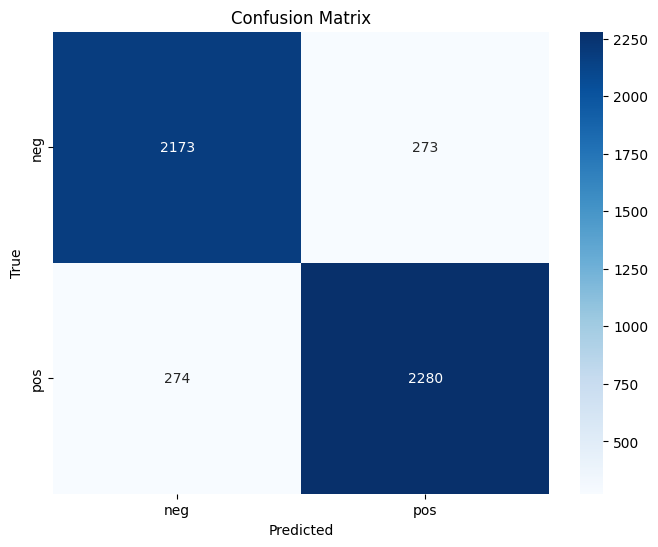

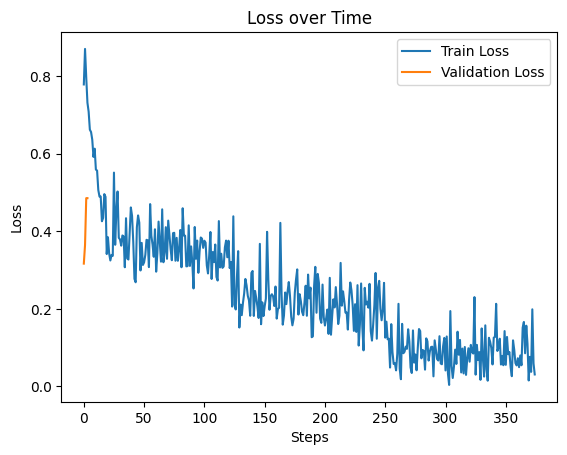

In [3]:
# Comprobar si CUDA está disponible
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

# Cargar los datos
df = pd.read_csv('train.csv')

# Convertir las etiquetas a valores numéricos
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

# Dividir el dataset en conjunto de entrenamiento y prueba
train_texts, val_texts, train_labels, val_labels = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

# Restablecer los índices de los conjuntos de datos
train_texts = train_texts.reset_index(drop=True)
val_texts = val_texts.reset_index(drop=True)
train_labels = train_labels.reset_index(drop=True)
val_labels = val_labels.reset_index(drop=True)

# Cargar el modelo y el tokenizador preentrenado
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=2)

# Tokenizar los textos
train_encodings = tokenizer(list(train_texts), truncation=True, padding=True, max_length=128)
val_encodings = tokenizer(list(val_texts), truncation=True, padding=True, max_length=128)

# Crear un dataset personalizado en PyTorch
class SentimentDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.long)  # Asegurarse de que las etiquetas sean LongTensor
        return item

train_dataset = SentimentDataset(train_encodings, train_labels)
val_dataset = SentimentDataset(val_encodings, val_labels)

# Definir los argumentos de entrenamiento
training_args = TrainingArguments(
    output_dir='./results',          # Carpeta de salida para los resultados
    num_train_epochs=3,              # Número de épocas de entrenamiento
    per_device_train_batch_size=16,  # Tamaño del batch para entrenamiento
    per_device_eval_batch_size=64,   # Tamaño del batch para evaluación
    warmup_steps=500,                # Pasos de calentamiento para el scheduler
    weight_decay=0.01,               # Peso de decaimiento
    logging_dir='./logs',            # Carpeta de salida para los logs
    evaluation_strategy="epoch",     # Estrategia de evaluación en cada época
    logging_steps=10,                # Frecuencia de los logs
    save_total_limit=2,              # Límite de guardado total
)

# Definir la función de métrica
def compute_metrics(p):
    pred_labels = p.predictions.argmax(-1)
    accuracy = accuracy_score(p.label_ids, pred_labels)
    return {'accuracy': accuracy}

# Crear el Trainer
trainer = Trainer(
    model=model,                         # El modelo a entrenar
    args=training_args,                  # Argumentos de entrenamiento
    train_dataset=train_dataset,         # Dataset de entrenamiento
    eval_dataset=val_dataset,            # Dataset de validación
    compute_metrics=compute_metrics      # Métrica de precisión
)

# Entrenar el modelo
trainer.train()

# Evaluar el modelo
eval_result = trainer.evaluate()

# Generar predicciones y el reporte de clasificación
predictions = trainer.predict(val_dataset)
pred_labels = predictions.predictions.argmax(-1)


Accuracy: 0.8906
Classification Report:
              precision    recall  f1-score   support

         neg       0.89      0.89      0.89      2446
         pos       0.89      0.89      0.89      2554

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



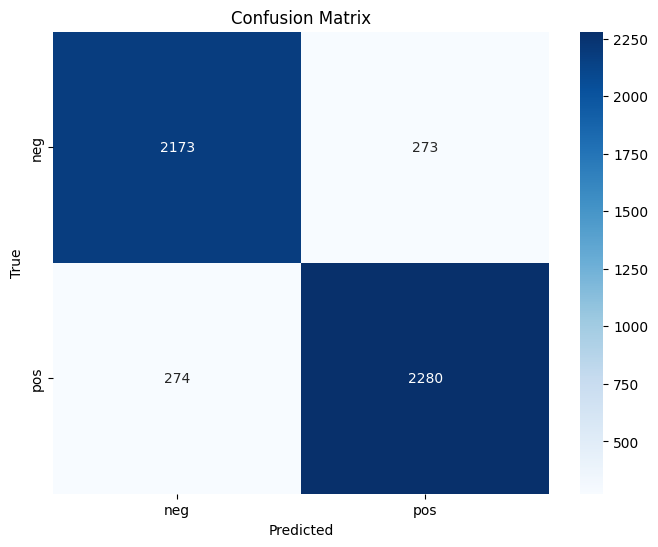

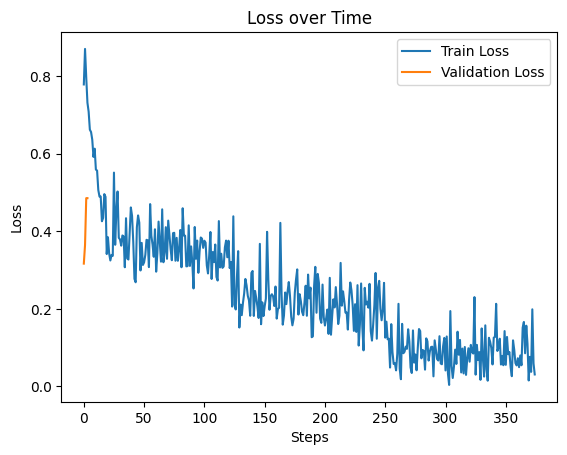

In [4]:
accuracy = accuracy_score(val_labels, pred_labels)
class_report = classification_report(val_labels, pred_labels, target_names=label_encoder.classes_)

print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(class_report)

# Graficar la matriz de confusión con seaborn
cm = confusion_matrix(val_labels, pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Graficar la pérdida a lo largo del tiempo
losses = trainer.state.log_history
train_losses = [x['loss'] for x in losses if 'loss' in x]
eval_losses = [x['eval_loss'] for x in losses if 'eval_loss' in x]

plt.plot(train_losses, label='Train Loss')
plt.plot(eval_losses, label='Validation Loss')
plt.title('Loss over Time')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.legend()
plt.show()